In [6]:
! /Users/admin/Desktop/venv/bin/python3 -m pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.2/948.2 kB 2.8 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.7/104.7 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 19.8 MB/s eta 0:00:0000:0100:01
  Created wheel for peewee: filename=peewee-3.17.8-cp312-cp312-macosx_10_9_universal2.whl size=426276 sha256=a13ccbc6cd7766fa32aca80c3912e082da46316ef64a3df768fb1e3ea5688514
  Stored in directory: /Users/admin/Library/Caches/pip/wheels/8f/65/34/456800445efeafb05164fe95285c70e81ba1d96bae30f43917
Successfully built peewee

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [8]:
import yfinance as yf

tesla_data = yf.download('TSLA', start='2010-01-01', end='2023-12-31')
tesla_data.reset_index(inplace=True)
print(tesla_data.head())

[*********************100%***********************]  1 of 1 completed

Price        Date     Close      High       Low      Open     Volume
Ticker                 TSLA      TSLA      TSLA      TSLA       TSLA
0      2010-06-29  1.592667  1.666667  1.169333  1.266667  281494500
1      2010-06-30  1.588667  2.028000  1.553333  1.719333  257806500
2      2010-07-01  1.464000  1.728000  1.351333  1.666667  123282000
3      2010-07-02  1.280000  1.540000  1.247333  1.533333   77097000
4      2010-07-06  1.074000  1.333333  1.055333  1.333333  103003500


In [11]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the webpage containing Tesla revenue data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Find the table
table = soup.find("table")

# Extract headers
headers = [header.text.strip() for header in table.find_all("th")]

# Extract rows
rows = []
for row in table.find_all("tr"):
    cells = row.find_all("td")
    if cells:  # Skip rows without data
        rows.append([cell.text.strip() for cell in cells])

# Ensure headers match the number of columns in rows
if not headers or len(headers) != len(rows[0]):
    headers = [f"Column {i+1}" for i in range(len(rows[0]))]

# Create the DataFrame
tesla_revenue = pd.DataFrame(rows, columns=headers)

# Display the last five rows
print(tesla_revenue.tail())


   Column 1 Column 2
8      2013   $2,013
9      2012     $413
10     2011     $204
11     2010     $117
12     2009     $112


In [12]:
gme_data = yf.download('GME', start='2010-01-01', end='2023-12-31')
gme_data.reset_index(inplace=True)
print(gme_data.head())


[*********************100%***********************]  1 of 1 completed

Price        Date     Close      High       Low      Open     Volume
Ticker                  GME       GME       GME       GME        GME
0      2010-01-04  3.854644  3.863060  3.703151  3.714934   26702800
1      2010-01-05  3.959006  3.996037  3.854644  3.856327   21269600
2      2010-01-06  4.044851  4.056634  3.908507  3.948905   21471200
3      2010-01-07  3.443930  3.563441  3.268872  3.368184  164761200
4      2010-01-08  3.415315  3.573540  3.405215  3.474228   47872400


In [16]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, 'html.parser')

# Find the table
table = soup.find("table")

# Extract headers, if present
headers = [header.text.strip() for header in table.find_all("th")]

# Extract rows
rows = []
for row in table.find_all("tr"):
    cells = row.find_all("td")
    if cells:  # Skip rows without data
        rows.append([cell.text.strip() for cell in cells])

# Handle cases where headers are missing or inconsistent
if not headers or len(headers) != len(rows[0]):
    headers = [f"Column {i+1}" for i in range(len(rows[0]))]  # Generate default headers

# Create a DataFrame
gme_revenue = pd.DataFrame(rows, columns=headers)

# Display the last five rows
print(gme_revenue.tail())


   Column 1 Column 2
11     2009   $8,806
12     2008   $7,094
13     2007   $5,319
14     2006   $3,092
15     2005   $1,843


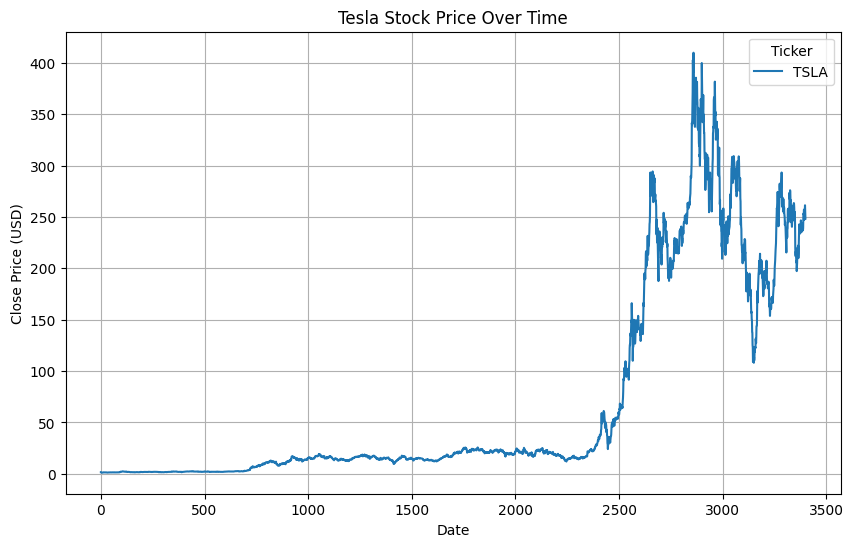

In [17]:
import matplotlib.pyplot as plt

def make_graph(data, title):
    data['Close'].plot(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Close Price (USD)")
    plt.grid()
    plt.show()

make_graph(tesla_data, "Tesla Stock Price Over Time")


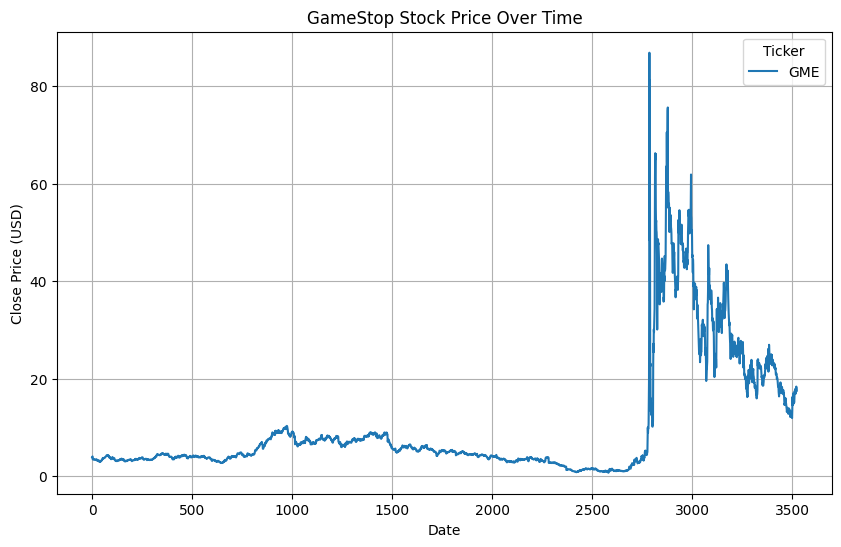

In [18]:
make_graph(gme_data, "GameStop Stock Price Over Time")
